# Logistic Regression
#### implemented from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark')
# plt.style.available

In [2]:
# making 2 normal distributions
mean1 = np.array([1,0.5])
cov1 = np.array([[1,0.1],[0.1,1.2]])
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
print(dist1.shape)

mean2 = np.array([4,5])
cov2 = np.array([[1.21,0.1],[0.1,1.3]])
dist2 = np.random.multivariate_normal(mean2, cov2, 500)
print(dist2.shape)

(500, 2)
(500, 2)


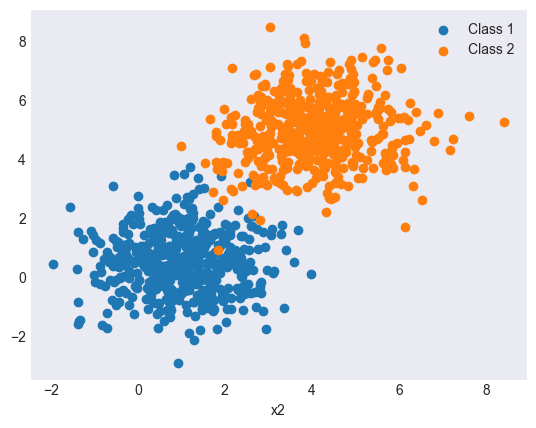

In [3]:
plt.figure(0)
plt.scatter(dist1[:,0], dist1[:,1], label='Class 1')
plt.scatter(dist2[:,0], dist2[:,1], label='Class 2')
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()

In [4]:
# train-test split
data = np.zeros((1000,3))
data[:500, :-1] = dist1
data[:500, -1] = 0.0
data[500:, :-1] = dist2
data[500:, -1] = 1.0

In [5]:
np.random.shuffle(data)
print(data[:10])

[[ 2.59475617  6.05571049  1.        ]
 [ 1.74359092 -0.32295302  0.        ]
 [ 4.89782507  5.38536152  1.        ]
 [ 0.71523999  0.08593549  0.        ]
 [ 8.41412198  5.26374786  1.        ]
 [ 2.92930732  6.50383054  1.        ]
 [ 3.69426881  5.57607752  1.        ]
 [ 2.83223943  5.82934626  1.        ]
 [ 4.5486553   5.89792997  1.        ]
 [-0.57368216  1.33203205  0.        ]]


In [6]:
split = int(0.8 * data.shape[0])

In [7]:
X_train = data[:split, :-1] 
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


#### Logistic regression logic

In [8]:
# converts hypothesis (distance+bias, in range (-INF,+INF)) into value in range (0,1)
def sigmoid(h):
    return 1.0 / (1.0 + np.exp(-1.0 * h))

In [9]:
# hypothesis(x=(x1,x2), w=(a,b), b=bias) = shortest distance btw data point and hyperplane + bias
def hyp(x, w, b):
    hx = np.dot(x, w) + b
    return sigmoid(hx)

In [10]:
def error(y, x, w, b):
    n = x.shape[0]
    err = 0.0
    
    for i in range(n):
        hx = hyp(x[i], w, b)
        err += y[i] * np.log2(hx) + (1-y[i]) * np.log2(1-hx)
    
    return err/n

In [11]:
# calculates gradients (partial derivatives dJ/dw = [dJ/da, dJ/db] where w=[a,b] AND dJ/db where b=bias)
def grads(y, x, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    n = x.shape[0]
    
    for i in range(n):
        hx = hyp(x[i], w, b)
        grad_w += (y[i] - hx) * x[i]
        grad_b += y[i] - hx
    
    grad_w /= n
    grad_b /= n
    return [grad_w, grad_b]

In [12]:
# changes w and b using their gradients, in efforts to maximize product of probabilities of points predicted to be in each class
def gradient_ascent(y, x, w, b, lr=0.01):
    err = error(y, x, w, b)
    [grad_w, grad_b] = grads(y, x, w, b)
    w += lr * grad_w
    b += lr * grad_b
    return err, w, b

In [13]:
# classifies single data point x=(x1,x2) into class y=0 or y=1
def predict(x, w, b):
    confidence = hyp(x, w, b)
    if confidence < 0.5:
        return 0
    else:
        return 1

In [14]:
# find what fraction of X_test data points are classified correctly by model represented by [w,b]
def get_accuracy(X_test, Y_test, w, b):
    n = Y_test.shape[0]
    Y_pred = []
    
    for i in range(n):
        p = predict(X_test[i], w, b)
        Y_pred.append(p)
    
    Y_pred = np.array(Y_pred)
    accuracy = float((Y_pred == Y_test).sum()) / n
    return accuracy

In [15]:
losses = []
accuracies = []

w = 2 * np.random.random((X_train.shape[1],))
b = 5 * np.random.random()

for i in range(1000):
    loss, w, b = gradient_ascent(Y_train, X_train, w, b, lr=0.1)
    losses.append(loss)
    accuracies.append(get_accuracy(X_test, Y_test, w, b))

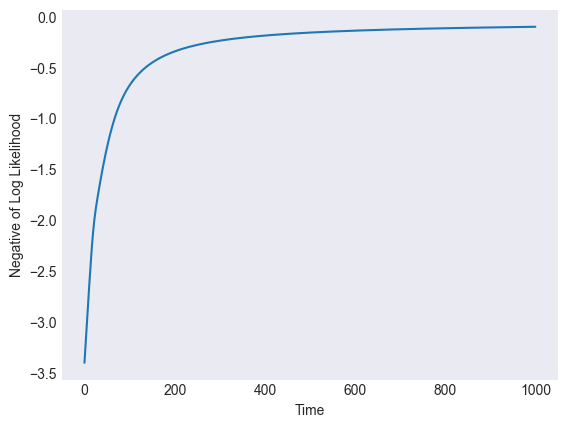

In [16]:
plt.plot(losses)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

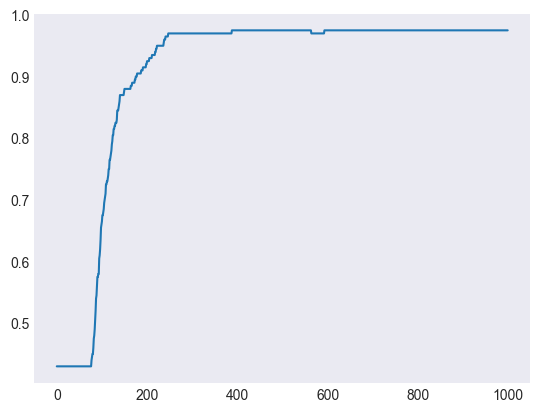

0.975


In [17]:
plt.plot(accuracies)
plt.show()
print(accuracies[-1])

### Plotting the hyperplane represented by the trained model

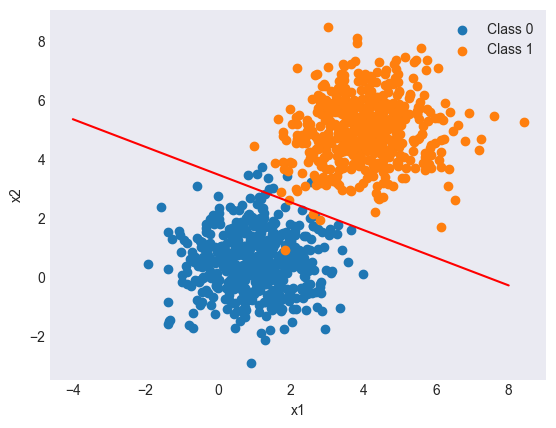

In [18]:
plt.figure(0)

plt.scatter(dist1[:,0], dist1[:,1], label='Class 0')
plt.scatter(dist2[:,0], dist2[:,1], label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x, y, color='red')

plt.legend()
plt.show()

In [19]:
# printing parameters obtained after training that represent trained model
print('w =', w)
print('b =', b)

w = [0.6227091  1.32565531]
b = -4.620820056549025
